In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pylab as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from ipywidgets import Layout
from IPython.display import Javascript, HTML
import ipywidgets as widgets

import json 
from PIL import Image, ImageDraw
from IPython.display import display
from shapely import wkt

In [3]:
def jl(fn):
    with open(fn, 'rb') as f:
        return json.load(f)

In [4]:
gt_loc=jl('/home/catskills/Desktop/dataxv2/xBD/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000030_pre_disaster.json')
gt_loc_class=jl('/home/catskills/Desktop/dataxv2/xBD/santa-rosa-wildfire/labels/santa-rosa-wildfire_00000030_post_disaster.json')
pred_loc=jl('/tmp/inference/santa-rosa-wildfire_00000030_pre_disaster/labels/santa-rosa-wildfire_00000030_pre_disaster.json')
pred_class=jl('/tmp/inference/classification_inference.json')
pred_loc_class=jl('/tmp/inference/inference.json')
score=jl('/home/catskills/Desktop/dataxv2/scoretest/score.json')

In [5]:
gt=gt_loc_class['features']['xy']

In [6]:
pred=pred_loc_class['features']['xy']

In [7]:
from display_chips import *

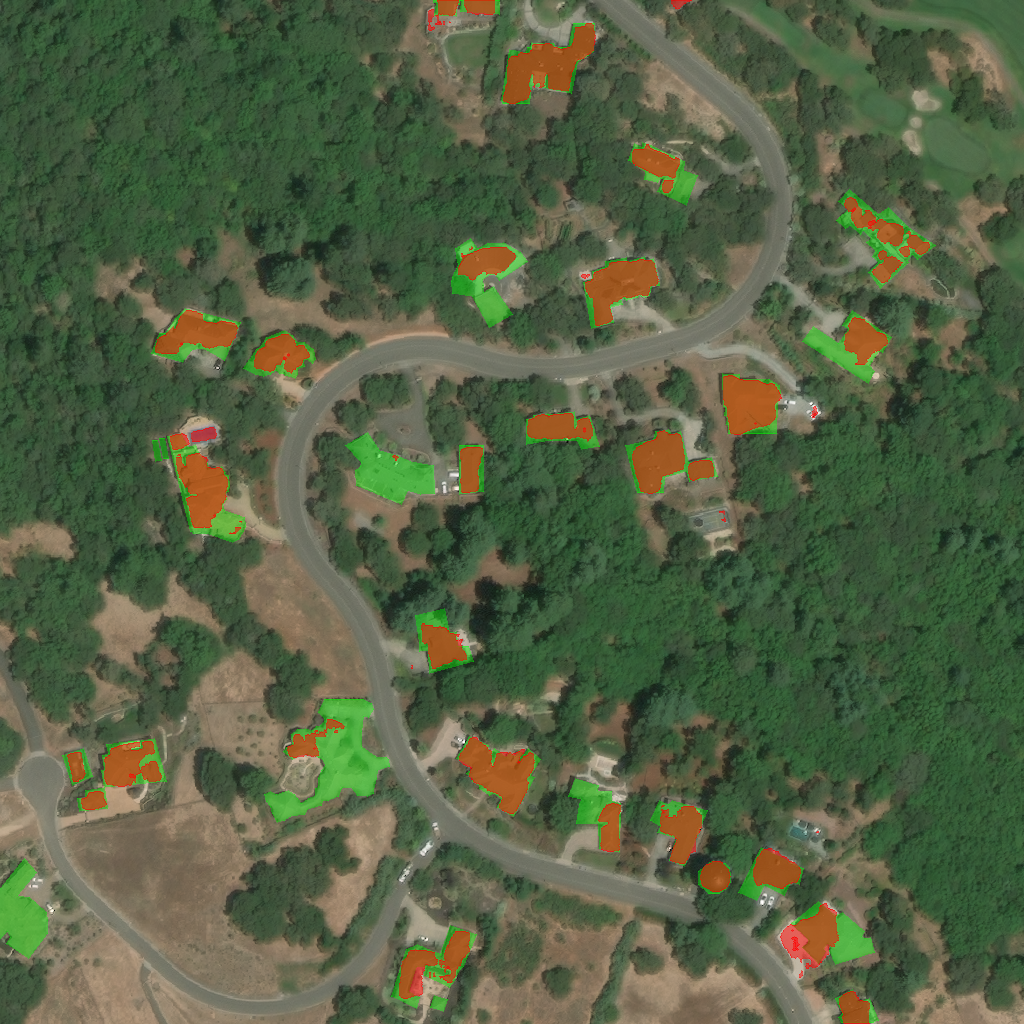

In [15]:
path_to_image_value ='/home/catskills/Desktop/dataxv2/xBD/santa-rosa-wildfire/images/santa-rosa-wildfire_00000030_pre_disaster.png'
display_chips2(path_to_image_value, pred, gt)

In [23]:
gtp=[y for x,y in json_to_polygons(gt)]

In [24]:
prp=[y for x,y in json_to_polygons(pred)]

In [25]:
len(gtp), len(prp)

(32, 78)

In [34]:
grouping=[(gt, [x for x in prp if x.intersects(gt)]) for gt in gtp]

In [35]:
sum([len(y) for x,y in grouping])

59

In [37]:
[len(y) for x,y in grouping]

[0,
 1,
 2,
 3,
 5,
 0,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 5,
 0,
 0,
 1,
 1,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 7,
 3,
 1]

In [41]:
[len([x for x in gtp if x.intersects(gt)]) for gt in prp]

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1]